# EMPLOYEE SURVEY RESPONSES ANALYSIS

Actual responses from an employee engagement survey conducted by Pierce County WA and completed voluntarily by government employees.

Recommended Analysis
1. Which survey questions did respondents agree with or disagree with most?

2. Do you see any patterns or trends by department or role?

IMPORTING NECESSARY LIBRARIES

In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

LOADING FILE

In [164]:
df = pd.read_excel(r'C:\Users\CHINELO\Downloads\HR Employee Survey Responses.xlsx')

In [165]:
df.head(10)

,Response ID,Status,Department,Director,Manager,Supervisor,Staff,Question,Response,Response Text
0,1,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
1,2,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
2,3,Complete,Parks and Recreation,0,1,0,0,1. I know what is expected of me at work,0.0,Not Applicable
3,4,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,3.0,Agree
4,5,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,0.0,Not Applicable
5,6,Complete,Prosecuting Attorney's Office,0,0,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
6,7,Complete,Prosecuting Attorney's Office,0,0,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
7,8,Complete,Finance and Performance Management,0,0,0,1,1. I know what is expected of me at work,4.0,Strongly Agree
8,9,Complete,Finance and Performance Management,0,0,0,0,1. I know what is expected of me at work,2.0,Disagree
9,10,Complete,Planning and Public Works,0,0,0,0,1. I know what is expected of me at work,4.0,Strongly Agree


### EXPLORATORY DATA ANALYSIS

In [166]:
df.shape

(14725, 10)

There are 14725 samples and 10 features

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14725 entries, 0 to 14724
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Response ID    14725 non-null  int64  
 1   Status         14725 non-null  object 
 2   Department     14725 non-null  object 
 3   Director       14725 non-null  int64  
 4   Manager        14725 non-null  int64  
 5   Supervisor     14725 non-null  int64  
 6   Staff          14725 non-null  int64  
 7   Question       14725 non-null  object 
 8   Response       14590 non-null  float64
 9   Response Text  14590 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [168]:
print(df.isnull().sum())

Response ID        0
Status             0
Department         0
Director           0
Manager            0
Supervisor         0
Staff              0
Question           0
Response         135
Response Text    135
dtype: int64


There are 135 missing values in both Reponse and Response Text

In [169]:
df.columns

Index(['Response ID', 'Status', 'Department', 'Director', 'Manager',
       'Supervisor', 'Staff', 'Question', 'Response', 'Response Text'],
      dtype='object')

In [170]:
df.dtypes

Response ID        int64
Status            object
Department        object
Director           int64
Manager            int64
Supervisor         int64
Staff              int64
Question          object
Response         float64
Response Text     object
dtype: object

CHECKING FOR UNIQUE VALUES IN EACH COLUMNS

In [171]:
# Iterate through each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Response ID': [    1     2     3 ... 14708 14709 14710]
Unique values in column 'Status': ['Complete' 'Incomplete']
Unique values in column 'Department': ['Human Resources' 'Communications Office' 'Parks and Recreation'
 "Prosecuting Attorney's Office" 'Finance and Performance Management'
 'Planning and Public Works' 'Human Services' "Sheriff's Department"
 "Assessor-Treasurer's Office" 'District Court' 'Superior Court'
 'Medical Examiner' 'Assigned Council' 'Facilities Management'
 'Emergency Management' "Council's Office" 'Clerk of Superior Court'
 'Juvenile Court' 'Exec Office & Directors' 'Family Justice Center'
 'Economic Development']
Unique values in column 'Director': [0 1]
Unique values in column 'Manager': [1 0]
Unique values in column 'Supervisor': [0 1]
Unique values in column 'Staff': [0 1]
Unique values in column 'Question': ['1. I know what is expected of me at work'
 '2. At work, I have the opportunity to do what I do best every day'
 '3. In the

It can be observed that there are mislabels in the RESPONSE feature that need to be cleaned

CHECKING FOR DUPLICATES

In [172]:
df.duplicated().sum()

15

There are 15 duplicate records in the dataset

In [173]:
df[df.duplicated()]

,Response ID,Status,Department,Director,Manager,Supervisor,Staff,Question,Response,Response Text
12,12,Complete,Planning and Public Works,0,0,0,0,1. I know what is expected of me at work,3.0,Agree
10433,10432,Complete,Finance and Performance Management,0,0,0,0,8. My supervisor holds employees accountable f...,4.0,Strongly Agree
10695,10693,Complete,Sheriff's Department,0,0,0,0,8. My supervisor holds employees accountable f...,4.0,Strongly Agree
10966,10963,Complete,Finance and Performance Management,0,0,1,0,8. My supervisor holds employees accountable f...,3.0,Agree
11170,11166,Complete,Prosecuting Attorney's Office,0,0,0,0,8. My supervisor holds employees accountable f...,3.0,Agree
11344,11339,Complete,Planning and Public Works,0,0,0,0,8. My supervisor holds employees accountable f...,4.0,Strongly Agree
11405,11399,Complete,Communications Office,0,0,0,0,8. My supervisor holds employees accountable f...,4.0,Strongly Agree
11636,11629,Complete,Parks and Recreation,0,0,0,0,8. My supervisor holds employees accountable f...,2.0,Disagree
12534,12526,Complete,Planning and Public Works,0,0,1,0,9. My department is inclusive and demonstrates...,4.0,Strongly Agree
12970,12961,Complete,Finance and Performance Management,0,0,0,0,9. My department is inclusive and demonstrates...,4.0,Strongly Agree


In [174]:
df.describe()

,Response ID,Director,Manager,Supervisor,Staff,Response
count,14725.000000,14725.000000,14725.000000,14725.000000,14725.000000,14590.000000
mean,7359.773990,0.011545,0.072733,0.112869,0.084890,2.984236
std,4247.861393,0.106829,0.259707,0.316444,0.278727,1.020201
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3681.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,7362.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,11040.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,14710.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### DATA CLEANING

HANDLING MISSING VALUES

In [175]:
df['Response'].unique()

array([ 4.,  0.,  3.,  2.,  1., nan])

In [176]:
# Filling missing values for the RESPONSE column using median
median_response = df['Response'].median()

df['Response'] = df['Response'].fillna(median_response)

print(df['Response'].isnull().sum())  

0


In [177]:
df['Response Text'].unique()

array(['Strongly Agree', 'Not Applicable', 'Agree', 'Disagree',
       'Strongly Disagree', nan], dtype=object)

In [178]:
# Filling missing values for the RESPONSE TEXT column using mode
mode_response = df['Response Text'].mode()

mode_response = mode_response[0]

df['Response Text'].fillna(mode_response, inplace=True)

print(df['Response Text'].isnull().sum())    

0


In [179]:
df['Response Text'].unique()

array(['Strongly Agree', 'Not Applicable', 'Agree', 'Disagree',
       'Strongly Disagree'], dtype=object)

RECHECKING FOR MISSING VALUES

In [180]:
print(df.isnull().sum())

Response ID      0
Status           0
Department       0
Director         0
Manager          0
Supervisor       0
Staff            0
Question         0
Response         0
Response Text    0
dtype: int64


DROPPING DUPLICATES IN THE DATASET

In [181]:
df = df.drop_duplicates(inplace=False)

In [182]:
df.duplicated().sum()

0

In [183]:
df.shape

(14710, 10)

CORRECTING MISLABELS IN THE QUESTION COLUMN

In [184]:
df['Question'].unique()

array(['1. I know what is expected of me at work',
       '2. At work, I have the opportunity to do what I do best every day',
       '3. In the last seven days, I have received recognition or praise for doing good work',
       '4. My supervisor, or someone at work, seems to care about me as a person',
       '5. The mission or purpose of our organization makes me feel my job is important',
       '6. I have a best friend at work',
       '7. This last year, I have had opportunities at work to learn and grow',
       '7. This last year, I have had opportunities at work to learn & grow',
       '8. My supervisor holds employees accountable for performance',
       '9. My department is inclusive and demonstrates support of a diverse workforce',
       '10. Overall I am satisfied with my job',
       '10. Overall I am satisfied with my job '], dtype=object)

In [185]:
# Cleaning up whitespace and replacing '&' with 'and'
df['Question'] = df['Question'].str.strip().str.replace('&', 'and', regex=True)

df['Question'] = df['Question'].replace({
    'This last year, I have had opportunities at work to learn and grow': 'This last year, I have had opportunities at work to learn and grow',
    'Overall I am satisfied with my job': 'Overall I am satisfied with my job'})

In [186]:
df['Question'].unique()

array(['1. I know what is expected of me at work',
       '2. At work, I have the opportunity to do what I do best every day',
       '3. In the last seven days, I have received recognition or praise for doing good work',
       '4. My supervisor, or someone at work, seems to care about me as a person',
       '5. The mission or purpose of our organization makes me feel my job is important',
       '6. I have a best friend at work',
       '7. This last year, I have had opportunities at work to learn and grow',
       '8. My supervisor holds employees accountable for performance',
       '9. My department is inclusive and demonstrates support of a diverse workforce',
       '10. Overall I am satisfied with my job'], dtype=object)

### WHICH SURVEY QUESTIONS DID RESPONDENTS AGREE WITH OR DISAGREE WITH MOST?

In [187]:
# Defining a mapping dictionary
response_mapping = {
    'Strongly Agree': 'Agree',
    'Agree': 'Agree',
    'Not Applicable': 'N/A',
    'Disagree': 'Disagree',
    'Strongly Disagree': 'Disagree'}

# Mapping the responses to categories
df['Response Category'] = df['Response Text'].map(response_mapping)

# Creating a summary DataFrame
summary = pd.DataFrame()

# Groupping by the Question column and calculate the counts for each category
summary['Agree'] = df[df['Response Category'] == 'Agree'].groupby('Question').size()
summary['Disagree'] = df[df['Response Category'] == 'Disagree'].groupby('Question').size()
summary['N/A'] = df[df['Response Category'] == 'N/A'].groupby('Question').size()

# Filling missing values with 0
summary = summary.fillna(0)

# Calculating agreement ratio if needed
summary['Agreement Ratio'] = summary['Agree'] / (summary['Agree'] + summary['Disagree'])

# Printing the summary
print(summary)

                                                    Agree  Disagree  N/A  \
Question                                                                   
1. I know what is expected of me at work             1359       107    5   
10. Overall I am satisfied with my job               1116       345   10   
2. At work, I have the opportunity to do what I...   1176       281   14   
3. In the last seven days, I have received reco...    943       495   33   
4. My supervisor, or someone at work, seems to ...   1260       196   15   
5. The mission or purpose of our organization m...   1172       282   17   
6. I have a best friend at work                       681       606  184   
7. This last year, I have had opportunities at ...   1116       317   38   
8. My supervisor holds employees accountable fo...   1077       355   39   
9. My department is inclusive and demonstrates ...   1195       237   39   

                                                    Agreement Ratio  
Question         

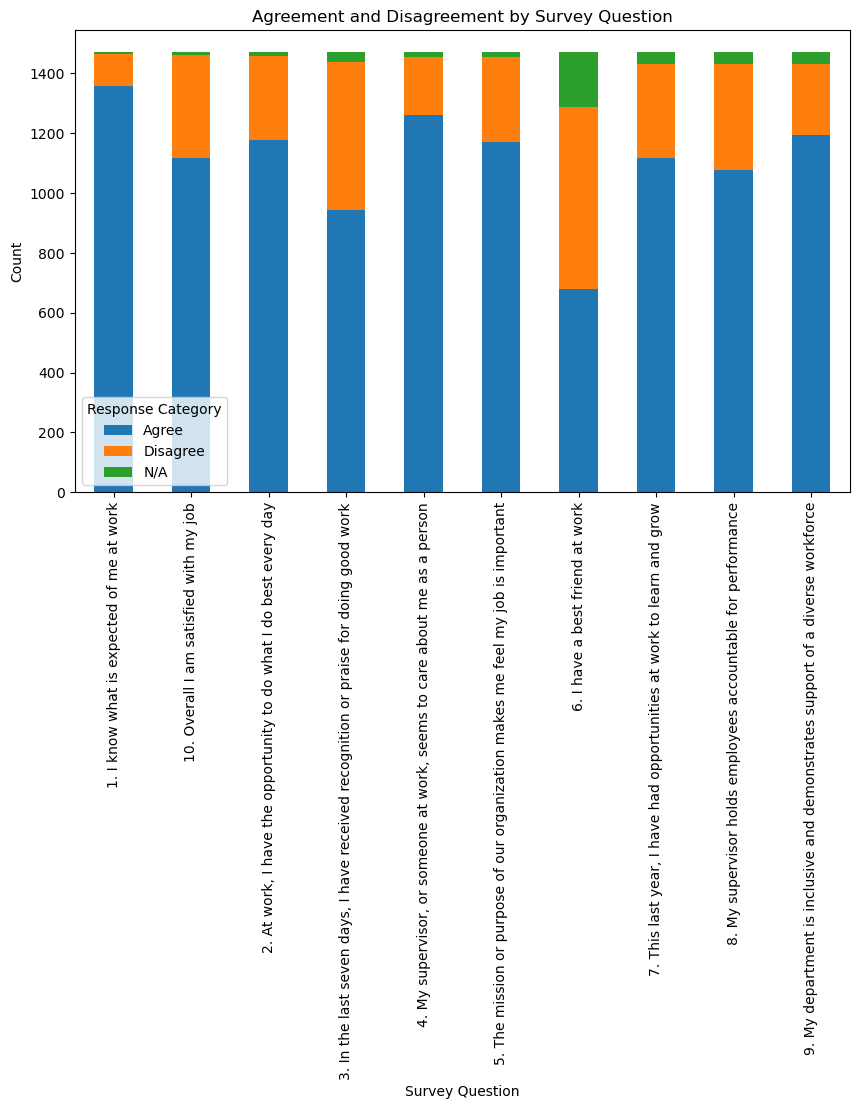

In [188]:
# Plotting the stacked bar plot
summary[['Agree', 'Disagree', 'N/A']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Agreement and Disagreement by Survey Question')
plt.xlabel('Survey Question')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Response Category')
plt.show()

It can be seen from the above illustration that the question the respondents agree with the most is 'I know what is expected of me at work'

While the question that the respondents disagree with the most is 'I have a best friend at work'

### DO YOU SEE ANY PATTERNS OR TRENDS BY DEPARTMENT OR ROLE?

In [189]:
df['Department'].unique()

array(['Human Resources', 'Communications Office', 'Parks and Recreation',
       "Prosecuting Attorney's Office",
       'Finance and Performance Management', 'Planning and Public Works',
       'Human Services', "Sheriff's Department",
       "Assessor-Treasurer's Office", 'District Court', 'Superior Court',
       'Medical Examiner', 'Assigned Council', 'Facilities Management',
       'Emergency Management', "Council's Office",
       'Clerk of Superior Court', 'Juvenile Court',
       'Exec Office & Directors', 'Family Justice Center',
       'Economic Development'], dtype=object)

### Distribution of responses by department

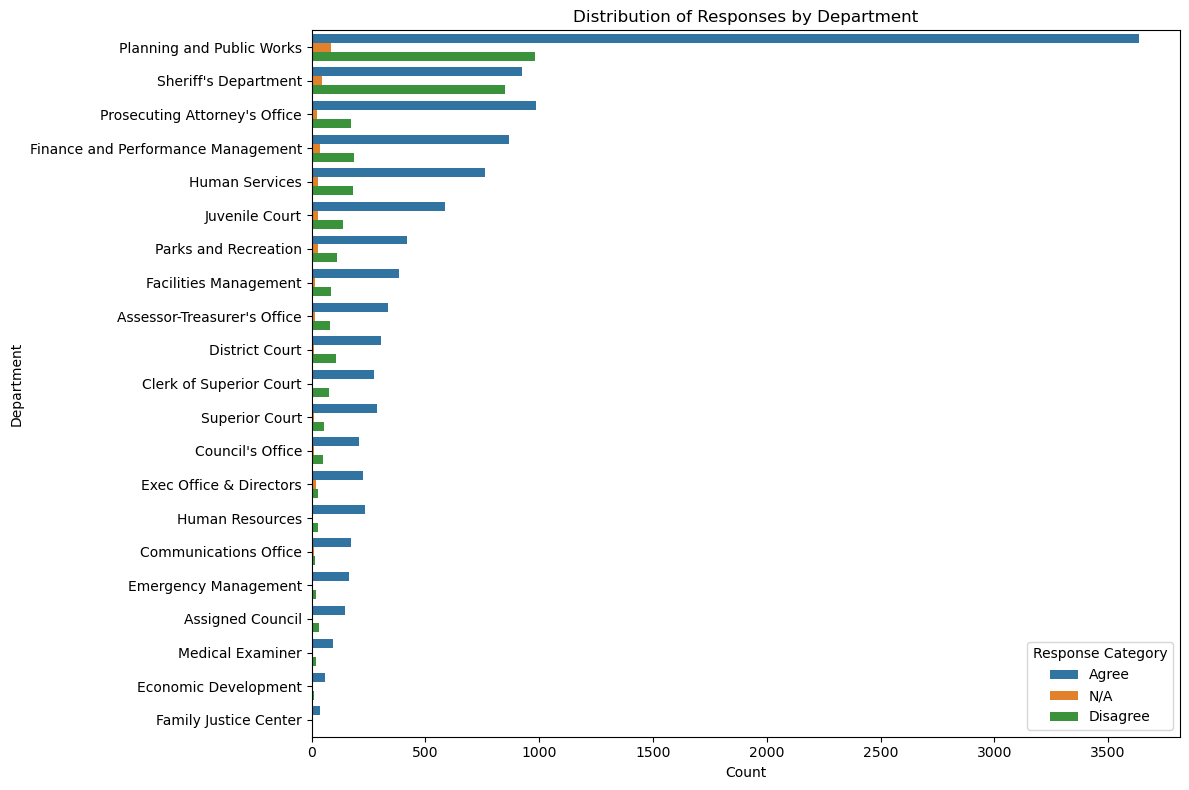

In [208]:
# Define a mapping dictionary for response text
response_mapping = {
    'Strongly Agree': 'Agree',
    'Agree': 'Agree',
    'Not Applicable': 'N/A',
    'Disagree': 'Disagree',
    'Strongly Disagree': 'Disagree'}

# Map the response text to the categories
df['Response Category'] = df['Response Text'].map(response_mapping)

# Plotting response distribution by department with mapped response categories
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Department', hue='Response Category', order=df['Department'].value_counts().index)
plt.title('Distribution of Responses by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Response Category')
plt.tight_layout()
plt.show()

All departments gave positive feedback on the survey questions